# K-NN algorithm :
- the dataset will be using is the Iris Datase
- Iris is a flower with three species corresponding to our three classes 
   
   <img src="images/iris.JPG" style="width:200;height:80;">

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, svm

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

In [10]:
n_neighbors = 15 # the K parameter of the algorithm
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

train accuracy: 80.0 %


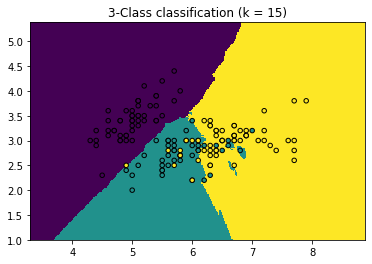

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Y_ = clf.predict(X)
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_ - y)) * 100))

plt.figure()
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=y,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"% (n_neighbors))
plt.show()

# Naive Bayes algorithm :
   ### Gausian Naive Bayes :
       The Iris dataset is a classical 3-class classification dataset with the following caracteristics :
   
   <img src="images/irisDS.JPG" style="width:600;height:200;">

### For each feature Xi: 
   
   <img src="images/gaussian.JPG" style="width:200;height:80;">

In [12]:
from sklearn.naive_bayes import GaussianNB


Probability of the class 1 : 0.3333 , class 2 : 0.3333, class 3 : 0.3333 

Variance for class 1 :  feature 1 : 0.1218 	feature 2: 0.1408
Variance for class 2 :  feature 1 : 0.2611 	feature 2: 0.0965
Variance for class 3 :  feature 1 : 0.3963 	feature 2: 0.1019

train accuracy: 78.0 %


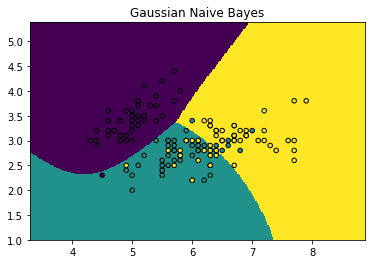

In [16]:
G_clf = GaussianNB()
G_clf.fit(X, y)

print("\nProbability of the class 1 : {:.4f} , class 2 : {:.4f}, class 3 : {:.4f} ".format(*G_clf.class_prior_))
print("\nVariance for class 1 :  feature 1 : {:.4f} \tfeature 2: {:.4f}".format(*G_clf.sigma_[0]))
print("Variance for class 2 :  feature 1 : {:.4f} \tfeature 2: {:.4f}".format(*G_clf.sigma_[1]))
print("Variance for class 3 :  feature 1 : {:.4f} \tfeature 2: {:.4f}".format(*G_clf.sigma_[2]))

Y_GN = G_clf.predict(X)
print("\ntrain accuracy: {} %".format(100 - np.mean(np.abs(Y_GN - y)) * 100))



# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = G_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=y,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Gaussian Naive Bayes")
plt.show()

# Support Vector Machine : 

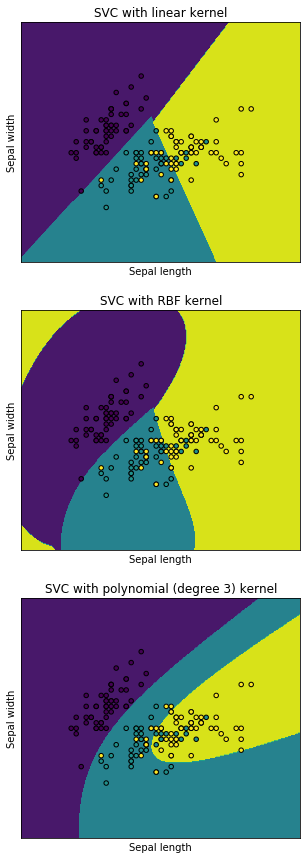

In [38]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

fig, sub = plt.subplots(3, 1, figsize = (5,15))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

for clf, title, ax in zip(models, titles, sub.flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
